<a href="https://colab.research.google.com/github/YardenNahum/WebCloud/blob/main/tirgul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install firebase

In [5]:
from firebase import firebase
FBconn = firebase.FirebaseApplication('https://crud-cc9cb-default-rtdb.firebaseio.com/',None)

In [6]:
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup

def fetch_page(url):
 response = requests.get(url)
 if response.status_code == 200:
  soup = BeautifulSoup(response.text, 'html.parser')
  return soup
 else:
  return None

In [7]:
import re
def index_words(soup):
  index = {}
  words = re.findall(r'\w+', soup.get_text())
  for word in words:
    word = word.lower()
    if word in index:
      index[word] += 1
    else:
      index[word] = 1
  return index

In [8]:
def remove_stop_words(index):
  stop_words = {'a', 'an', 'the', 'and', 'or',     				'in', 'on', 'at'}
  for stop_word in stop_words:
    if stop_word in index:
      del index[stop_word]
  return index

In [9]:
from nltk.stem import PorterStemmer
def apply_stemming(index):
  stemmer = PorterStemmer()
  stemmed_index = {}
  for word, count in index.items():
    stemmed_word = stemmer.stem(word)
    if stemmed_word in stemmed_index:
      stemmed_index[stemmed_word] += count
    else:
      stemmed_index[stemmed_word] = count
  return stemmed_index

In [10]:
def search(query, index):
  stemmer = PorterStemmer()
  query_words = re.findall(r'\w+', query.lower())
  results = {}
  for word in query_words:
    word = stemmer.stem(word)
    if word in index:
      results[word] = index[word]
  return results

In [11]:
def search_engine(url, query):
  soup = fetch_page(url)
  if soup is None:
     return None
  index = index_words(soup)
  index = remove_stop_words(index)
  index = apply_stemming(index)
  results = search(query, index)
  return results

In [12]:
def get_all_records():
    """Retrieve all words records"""
    return FBconn.get('/Tirgul6/', None)

def update_word(record_id, new_count):
    """Update an existing word record"""
    return FBconn.put('/Tirgul6/' + record_id, 'wordCount', new_count)

def saveToDB(results):
  for word, count in results.items():
      update_word(word, count)
      print(f"Word '{word}' added successfully!")






In [13]:
def get_links(url):
  response = requests.get(url)
  if response.status_code == 200:
    links = re.findall(r'href=[\'"]?(https?://[^\'" >]+)', response.text)
    return links
  else:
    return None
def related_links(links, index):
    for link in links:
      soup = fetch_page(link)
      if soup is None:
        continue
      words = re.findall(r'\w+', soup.get_text())
      #calc Rank of the page
      for word in words:
        results = search(word, index)
        rank=1
        for wordr, count in results.items():
          rank = rank*1/count
        rank = 1-rank
        print(rank)
        print(link)



In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plotData(index):
  plt.title("Loreal's word count chart")
  plt.bar(list(index.keys())[:10], list(index.values())[:10])
  plt.xticks(rotation=45)
  plt.xlabel("Words")
  plt.ylabel("Count")
  plt.show()

Streaming output truncated to the last 5000 lines.
0.0
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0.0
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0.0
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0.8571428571428572
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0.9583333333333334
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0.9583333333333334
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0
https://www.loreal-finance.com/eng/news-release/annual-general-meeting-29-april-2025
0
https://www.loreal-f

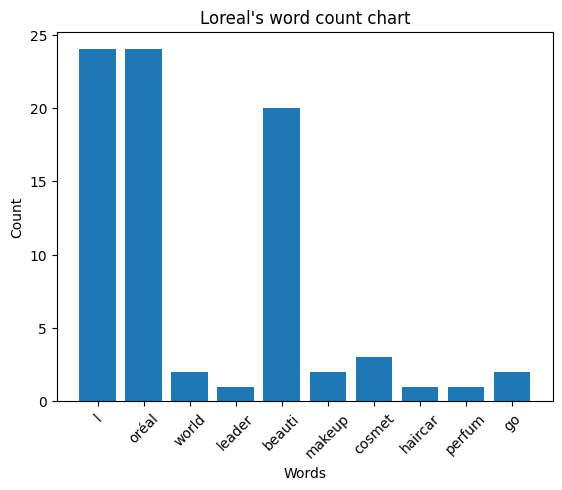

In [28]:
url = 'https://www.loreal.com/en/'
soup = fetch_page(url)
index = index_words(soup)
#Sort the index to get the 10 most common words
sorted_index = sorted(index.items(), key=lambda x: x[1], reverse=True)
index = remove_stop_words(index)
index = apply_stemming(index)
#make the query of the most common words
query = ""
for word, count in sorted_index[:12]:
    query += word + " "
query = query.strip()
results = search(query, index)

#calc Rank of the page
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank
print(rank)
#Save words with count to DB
saveToDB(results)

#present links
links = get_links(url)
related_links(links,index)
plotData(index)